# Project Image Recognition:  CNN classifier for 10 monkey species 

## Introduction

* This project uses data publically available through Kaggle. The data involves 1300-1400 images of 10 different monkey species. Each image has a size of 400x300 or more size. The original data can be found at the following source. 
    * Source: https://www.kaggle.com/slothkong/10-monkey-species

* The ten monkey species are listed below. 

| Species Name | Common Name |
                  | ------  | ------ |
  | Alouatta Palliata |         Mantled Howler |
| Erythrocebus Patas	|  Patas Monkey |
| Cacajao Calvus | Bald Uakari |
| Macaca Fuscata | Japanese Macaque |
| Cebuella Pygmea | Pygmy Marmoset |
| Cebus Capucinus | White Headed Capuchin |
| Mico Argentatus | Silvery Marmoset |
| Saimiri Sciureus | Common Squirrel Monkey |
| Aotus Nigriceps	| Black Headed Night Monkey |
| Trachypithecus Johnii | Nilgiri Langur |

* All of the classes have 131-152 images for training and 26-30 for Validation. More information on the dataset can be found at the Kaggle pace for the dataset.


* This project applies a Convolutional Neural Network( CNN) model to the classification task to study fine grain classfication problems. Fine grain classifcation refers to the detailed classification problem rather than identifying a general class type such as monkey. 

## Design 
* To experiment and improve the deep learning model's performance, multiple models each with the same architecture and a different learning rate are instantiated, trained, and tested. 
    * The different learning rates for different models were divided into two sets of trials:
        * Trials 1-4 were to find a high performance range of learning rates 
        * Trials 5-7 were to identify an optimal learning rate in that range
    * The learning rates tested were:
        * Trial 1: LR = 0.01
        * Trial 2: LR = 0.001
        * Trial 3: LR = 0.0001
        * Trial 4: LR = 0.00001
        
        * Trial 5: LR = 0.0003
        * Trial 6: LR = 0.0005
        * Trial 7: LR = 0.0008
 
* This notebook includes Trials 5-7

### Install the required packages 

In [1]:
#Start by setting up PyTorch and other requirements
!pip3 install torch torchvision

In [2]:
#Import Statements
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import transforms, utils,datasets, models
import PIL.Image
from google.colab import files
import zipfile
import io
from torch.utils.data.sampler import SubsetRandomSampler

from matplotlib import pyplot as plt
from google.colab import files

print("All libraries have been imported successfully")

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print("Training on CPU")
else:
    print("Cuda is available. Training on GPU")

All libraries have been imported successfully
Cuda is available. Training on GPU


In [0]:
#Load the training data zip
uploaded = files.upload()


In [0]:
#Unzip the training zip
zf = zipfile.ZipFile(io.BytesIO(uploaded['train2.zip']), "r")
zf.extractall()


In [0]:
#Load the validation data zip
validloaded = files.upload()


In [0]:
#Unzip the validation zip
zf2 = zipfile.ZipFile(io.BytesIO(validloaded['valid.zip']), "r")
zf2.extractall()

##  Building the Dataset

* The training and test data are derived from the train.zip image dataset through random sampling. 
* The validation data is derived from the entirety of the valid.zip

* Unique Ideas/Aspects
    * The transforms normalize the train, test, and validation data to a range of [-2,2]. This wider than normal normalization was intentionally designed to increase the range of possible values for image pixels. This dataset in particular contains both drastically differing and overlapping class attributes for different monkey species. A wider normalization was chosen so that the increased range of possible values would allow for greater differentiation by the model for different image pixel values.


In [73]:
#Create The test and train set

#Parameters for Train/Test Splitting
num_workers = 0
batch_size= 137
data_dir = 'train'
test_size = 0.25

#Tranforms for the training and test dataset
#    The images are resized to 128x128. The random horizontal and vertical flip increase the learning potential of the network
#    The Normalize function normalizes all values in the image matrix to [-2,2]. This greater range over the traditional [-1,1] or [0,1] was chosen 
#         to increase the range of possible values, which should allow further differentiation between different image pixel values
data_train_transforms = transforms.Compose([transforms.Resize((128,128)), transforms.RandomHorizontalFlip(p=0.3),transforms.RandomVerticalFlip(p=0.3) , 
                                            transforms.ToTensor(), transforms.Normalize([0.5,0.5,0.5],[0.25,0.25,0.25])])
data_test_transforms = transforms.Compose([transforms.Resize((128,128)), transforms.ToTensor(), transforms.Normalize([0.5,0.5,0.5],[0.25,0.25,0.25])])

#Import the training Image folder. 
#Import the training Image folder a second time as 'test_data' because the transforms for the test and training set are different.
train_data =  datasets.ImageFolder(data_dir, transform = data_train_transforms)
test_data = datasets.ImageFolder(data_dir, transform = data_test_transforms)

#Randomly split indices based on test_size fraction
#Total 1096 images
#Training: 822
#Test: 274

count_train = len(train_data)
train_indices = list(range(count_train))
np.random.shuffle(train_indices)
traintestsplit = int(np.floor(test_size * count_train))
traindata_idx, testdata_idx = train_indices[traintestsplit:], train_indices[:traintestsplit]

train_sampler = SubsetRandomSampler(traindata_idx)
test_sampler = SubsetRandomSampler(testdata_idx)

#Create the training and test dataloaders
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler = train_sampler, num_workers=num_workers)

test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, sampler = test_sampler, num_workers = num_workers)
print("The Train and Test dataloaders were created")

The Train and Test dataloaders were created


In [8]:
# Create the Validation dataset

#Define the transforms for the dataset
data_valid_transforms = transforms.Compose([transforms.Resize((128,128)), transforms.ToTensor(), transforms.Normalize([0.5,0.5,0.5],[0.25,0.25,0.25])])

#Import the validation dataset
valid_dir = 'valid'
valid_data = datasets.ImageFolder(valid_dir, transform = data_valid_transforms)

#Create the validation dataloader
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size= 90, shuffle=True)
print("The Validation dataloader was defined")

The Validation dataloader was defined


* The following training, validation and test datasets were created with their corresponding dataloaders



             
| Dataset | Images | 
      |------|------|
|Training | 822 |
| Test  | 274 |
| Valid | 274 |
| 


## Building the CNN Model


In [9]:
#Define the CNN model

class MonkeySpeciesCNN(nn.Module):
    def __init__(self):
        super(MonkeySpeciesCNN, self).__init__()
        #Input is 128x128x3 tensor
        self.conv1 = nn.Conv2d(3, 16,4, padding =1, stride =2)
        #Batch Normalization on layer outputs
        self.conv1_BN = nn.BatchNorm2d(16)
        #Input is 64x64x16
        
        self.conv2 = nn.Conv2d(16, 32,3, padding =1)
        self.conv2_BN = nn.BatchNorm2d(32)
        #Input is 32x32x32 
        self.conv3 = nn.Conv2d(32,64,3,  padding = 1)
        self.conv3_BN = nn.BatchNorm2d(64)
        #Output is 16x16x64
        
        #max pooling Layer
        self.pool = nn.MaxPool2d(2,2)
        #linear layer(4*4*512)
        self.fc1 = nn.Linear(4096, 100)
        self.fc2 = nn.Linear(100, 1000)
        self.fc3 = nn.Linear(1000, 10)
        self.dropout =  nn.Dropout(0.25)
    
    def forward(self,x):
        x = self.pool(F.relu(self.conv1_BN(self.conv1(x))))
        x = self.pool(F.relu(self.conv2_BN(self.conv2(x))))
        x = self.pool(F.relu(self.conv3_BN(self.conv3(x))))
        
        x = x.view(-1,8*64*8)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.log_softmax(self.fc3(x),dim=1)
        return x

classes = ['monkey1', 'monkey2', 'monkey3', 'monkey4', 'monkey5', 'monkey6', 'monkey7',
          'monkey8', 'monkey9','monkey10']

print("The Monkey Species CNN class was successfully defined")
    

The Monkey Species CNN class was successfully defined


## Trial 5: LR = 0.0003

In [10]:
#Define the model
#The following notation was used: 
#    MonkeyClassifier1: model for Trial 1(LR = 0.01)

MonkeyClassifier5 = MonkeySpeciesCNN()
#Print the model
print(MonkeyClassifier5)


MonkeySpeciesCNN(
  (conv1): Conv2d(3, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv1_BN): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_BN): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_BN): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=10, bias=True)
  (dropout): Dropout(p=0.25)
)


In [11]:
#Define the Criterion, Optimizer, and move the model to the GPU

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizer5 = optim.Adam(MonkeyClassifier5.parameters(), lr=0.0003)
MonkeyClassifier5.to(device)



MonkeySpeciesCNN(
  (conv1): Conv2d(3, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv1_BN): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_BN): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_BN): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=10, bias=True)
  (dropout): Dropout(p=0.25)
)

Epoch: 0 	Training Loss: 1.712295 	Validation Loss: 2.300966
Epoch: 1 	Training Loss: 1.655037 	Validation Loss: 2.292962
Epoch: 2 	Training Loss: 1.567093 	Validation Loss: 2.262725
Epoch: 3 	Training Loss: 1.479291 	Validation Loss: 2.178980
Epoch: 4 	Training Loss: 1.389610 	Validation Loss: 1.988826
Epoch: 5 	Training Loss: 1.294533 	Validation Loss: 1.756897
Epoch: 6 	Training Loss: 1.223239 	Validation Loss: 1.618518
Epoch: 7 	Training Loss: 1.152490 	Validation Loss: 1.525982
Epoch: 8 	Training Loss: 1.103458 	Validation Loss: 1.465069
Epoch: 9 	Training Loss: 1.037244 	Validation Loss: 1.409920
Epoch: 10 	Training Loss: 1.017383 	Validation Loss: 1.381528
Epoch: 11 	Training Loss: 0.994894 	Validation Loss: 1.353882
Epoch: 12 	Training Loss: 0.959624 	Validation Loss: 1.342323
Epoch: 13 	Training Loss: 0.929755 	Validation Loss: 1.279999
Epoch: 14 	Training Loss: 0.899934 	Validation Loss: 1.290719
Epoch: 15 	Training Loss: 0.871150 	Validation Loss: 1.267558
Epoch: 16 	Trainin

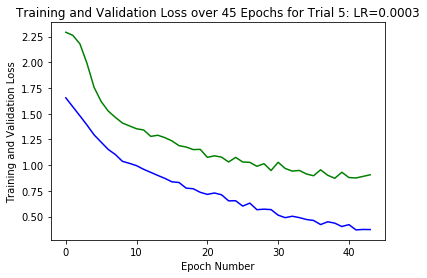

In [12]:
#Train the model

n_epochs = 45

trainLossList5 = []
validLossList5 = []

for epoch in range(n_epochs):
    train_loss = 0.0
    valid_loss = 0.0
    #Train the model on the training data
    MonkeyClassifier5.train()
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer5.zero_grad()
        logps = MonkeyClassifier5(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer5.step()
        train_loss += loss.item()*inputs.size(0)
        
    train_loss = train_loss/len(train_dataloader.dataset)
    
    #Validate the model on the validation data
    MonkeyClassifier5.eval()
    for vinputs, vlabels in valid_dataloader:
        vinputs, vlabels = vinputs.to(device), vlabels.to(device)
        output = MonkeyClassifier5(vinputs)
        vloss = criterion(output,vlabels)
        valid_loss += vloss.item()*vinputs.size(0)
    valid_loss = valid_loss/len(valid_dataloader.dataset)
    
    if epoch != 0:
        trainLossList5.append(train_loss)
        validLossList5.append(valid_loss)
        
    
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch,train_loss, valid_loss))
    
#Save the network weights
torch.save(MonkeyClassifier5.state_dict(), 'monkeyModelWeightsTrial5.pth')



fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(trainLossList5)), trainLossList5, 'b')
plt.plot(np.arange(len(validLossList5)), validLossList5, 'g')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch Number')
plt.title('Training and Validation Loss over 45 Epochs for Trial 5: LR=0.0003')
plt.show()



In [0]:
files.download('monkeyModelWeightsTrial5.pth')

In [14]:
# Predict classes for Test Dataset 1

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


MonkeyClassifier5.eval()

for data, target in test_dataloader:
    data, target = data.cuda(), target.cuda()
    output = MonkeyClassifier5(data)
    loss = criterion(output, target)

    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output,1)
    correct_tensor = pred.eq(target.data.view_as(pred))
    
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    for i in range(1,batch_size): 
        label = target.data[i-1]
        class_correct[label] += correct[i].item()
        class_total[label] +=1
    
test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(0,10):
    if class_total[i]>0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' %( classes[i], 100*class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct) / np.sum(class_total), np.sum(class_correct), np.sum(class_total)))


Test Loss: 0.263784

Test Accuracy of monkey1: 55% (11/20)
Test Accuracy of monkey2: 77% (17/22)
Test Accuracy of monkey3: 70% (21/30)
Test Accuracy of monkey4: 67% (21/31)
Test Accuracy of monkey5: 71% (28/39)
Test Accuracy of monkey6: 62% (15/24)
Test Accuracy of monkey7: 78% (18/23)
Test Accuracy of monkey8: 53% (15/28)
Test Accuracy of monkey9: 53% (15/28)
Test Accuracy of monkey10: 81% (22/27)

Test Accuracy (Overall): 67% (183/272)


## Trial 6: LR = 0.0005

In [15]:
#Define the model

MonkeyClassifier6 = MonkeySpeciesCNN()
#Print the model
print(MonkeyClassifier6)


MonkeySpeciesCNN(
  (conv1): Conv2d(3, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv1_BN): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_BN): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_BN): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=10, bias=True)
  (dropout): Dropout(p=0.25)
)


In [16]:
#Define the Criterion, Optimizer, and move the model to the GPU

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizer6 = optim.Adam(MonkeyClassifier6.parameters(), lr=0.0005)
MonkeyClassifier6.to(device)

MonkeySpeciesCNN(
  (conv1): Conv2d(3, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv1_BN): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_BN): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_BN): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=10, bias=True)
  (dropout): Dropout(p=0.25)
)

Epoch: 0 	Training Loss: 1.689893 	Validation Loss: 2.298448
Epoch: 1 	Training Loss: 1.571888 	Validation Loss: 2.298983
Epoch: 2 	Training Loss: 1.461370 	Validation Loss: 2.272518
Epoch: 3 	Training Loss: 1.352092 	Validation Loss: 2.192166
Epoch: 4 	Training Loss: 1.297152 	Validation Loss: 2.070153
Epoch: 5 	Training Loss: 1.220925 	Validation Loss: 1.878967
Epoch: 6 	Training Loss: 1.151147 	Validation Loss: 1.778421
Epoch: 7 	Training Loss: 1.123181 	Validation Loss: 1.528442
Epoch: 8 	Training Loss: 1.050469 	Validation Loss: 1.506106
Epoch: 9 	Training Loss: 1.032715 	Validation Loss: 1.399041
Epoch: 10 	Training Loss: 0.960096 	Validation Loss: 1.361715
Epoch: 11 	Training Loss: 0.908358 	Validation Loss: 1.377319
Epoch: 12 	Training Loss: 0.927789 	Validation Loss: 1.300205
Epoch: 13 	Training Loss: 0.849085 	Validation Loss: 1.261262
Epoch: 14 	Training Loss: 0.824981 	Validation Loss: 1.202808
Epoch: 15 	Training Loss: 0.802110 	Validation Loss: 1.242491
Epoch: 16 	Trainin

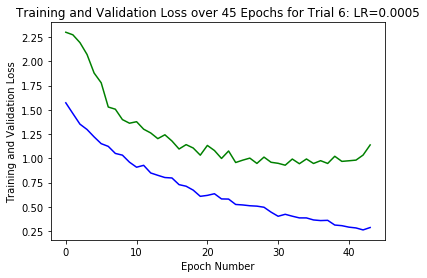

In [17]:
#Train the model

n_epochs = 45

trainLossList6 = []
validLossList6 = []

for epoch in range(n_epochs):
    train_loss = 0.0
    valid_loss = 0.0
    #Train the model on the training data
    MonkeyClassifier6.train()
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer6.zero_grad()
        logps = MonkeyClassifier6(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer6.step()
        train_loss += loss.item()*inputs.size(0)
        
    train_loss = train_loss/len(train_dataloader.dataset)
    
    #Validate the model on the validation data
    MonkeyClassifier6.eval()
    for vinputs, vlabels in valid_dataloader:
        vinputs, vlabels = vinputs.to(device), vlabels.to(device)
        output = MonkeyClassifier6(vinputs)
        vloss = criterion(output,vlabels)
        valid_loss += vloss.item()*vinputs.size(0)
    valid_loss = valid_loss/len(valid_dataloader.dataset)
    
    if epoch != 0:
        trainLossList6.append(train_loss)
        validLossList6.append(valid_loss)
        
    
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch,train_loss, valid_loss))
    
#Save the network weights
torch.save(MonkeyClassifier6.state_dict(), 'monkeyModelWeightsTrial6.pth')



fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(trainLossList6)), trainLossList6, 'b')
plt.plot(np.arange(len(validLossList6)), validLossList6, 'g')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch Number')
plt.title('Training and Validation Loss over 45 Epochs for Trial 6: LR=0.0005')
plt.show()


In [0]:
files.download('monkeyModelWeightsTrial6.pth')

In [19]:
# Predict classes for Test Dataset 

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


MonkeyClassifier6.eval()

for data, target in test_dataloader:
    data, target = data.cuda(), target.cuda()
    output = MonkeyClassifier6(data)
    loss = criterion(output, target)

    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output,1)
    correct_tensor = pred.eq(target.data.view_as(pred))
    
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    for i in range(1,batch_size): 
        label = target.data[i-1]
        class_correct[label] += correct[i].item()
        class_total[label] +=1
    
test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(0,10):
    if class_total[i]>0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' %( classes[i], 100*class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct) / np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.273771

Test Accuracy of monkey1: 70% (14/20)
Test Accuracy of monkey2: 63% (14/22)
Test Accuracy of monkey3: 70% (21/30)
Test Accuracy of monkey4: 64% (20/31)
Test Accuracy of monkey5: 56% (22/39)
Test Accuracy of monkey6: 72% (18/25)
Test Accuracy of monkey7: 73% (17/23)
Test Accuracy of monkey8: 59% (16/27)
Test Accuracy of monkey9: 75% (21/28)
Test Accuracy of monkey10: 66% (18/27)

Test Accuracy (Overall): 66% (181/272)


## Trial 7: LR = 0.0008

In [20]:
#Define the model

MonkeyClassifier7 = MonkeySpeciesCNN()
#Print the model
print(MonkeyClassifier7)


MonkeySpeciesCNN(
  (conv1): Conv2d(3, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv1_BN): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_BN): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_BN): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=10, bias=True)
  (dropout): Dropout(p=0.25)
)


In [21]:
#Define the Criterion, Optimizer, and move the model to the GPU

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizer7 = optim.Adam(MonkeyClassifier7.parameters(), lr=0.0008)
MonkeyClassifier7.to(device)

MonkeySpeciesCNN(
  (conv1): Conv2d(3, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv1_BN): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_BN): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_BN): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=10, bias=True)
  (dropout): Dropout(p=0.25)
)

Epoch: 0 	Training Loss: 1.705111 	Validation Loss: 2.295528
Epoch: 1 	Training Loss: 1.567116 	Validation Loss: 2.269095
Epoch: 2 	Training Loss: 1.424968 	Validation Loss: 2.111760
Epoch: 3 	Training Loss: 1.310006 	Validation Loss: 1.921545
Epoch: 4 	Training Loss: 1.214292 	Validation Loss: 1.840062
Epoch: 5 	Training Loss: 1.151197 	Validation Loss: 1.577468
Epoch: 6 	Training Loss: 1.086055 	Validation Loss: 1.633173
Epoch: 7 	Training Loss: 1.074697 	Validation Loss: 1.433238
Epoch: 8 	Training Loss: 1.018696 	Validation Loss: 1.424572
Epoch: 9 	Training Loss: 0.999062 	Validation Loss: 1.358332
Epoch: 10 	Training Loss: 0.932504 	Validation Loss: 1.434513
Epoch: 11 	Training Loss: 0.925292 	Validation Loss: 1.306277
Epoch: 12 	Training Loss: 0.869155 	Validation Loss: 1.293933
Epoch: 13 	Training Loss: 0.798476 	Validation Loss: 1.277844
Epoch: 14 	Training Loss: 0.804129 	Validation Loss: 1.204815
Epoch: 15 	Training Loss: 0.747332 	Validation Loss: 1.178079
Epoch: 16 	Trainin

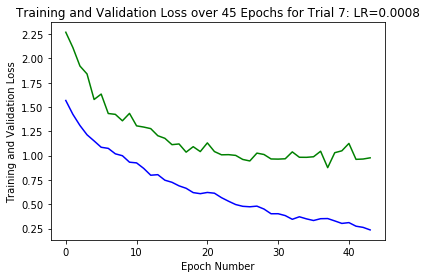

In [22]:
#Train the model

n_epochs = 45

trainLossList7 = []
validLossList7 = []

for epoch in range(n_epochs):
    train_loss = 0.0
    valid_loss = 0.0
    #Train the model on the training data
    MonkeyClassifier7.train()
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer7.zero_grad()
        logps = MonkeyClassifier7(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer7.step()
        train_loss += loss.item()*inputs.size(0)
        
    train_loss = train_loss/len(train_dataloader.dataset)
    
    #Validate the model on the validation data
    MonkeyClassifier7.eval()
    for vinputs, vlabels in valid_dataloader:
        vinputs, vlabels = vinputs.to(device), vlabels.to(device)
        output = MonkeyClassifier7(vinputs)
        vloss = criterion(output,vlabels)
        valid_loss += vloss.item()*vinputs.size(0)
    valid_loss = valid_loss/len(valid_dataloader.dataset)
    
    if epoch != 0:
        trainLossList7.append(train_loss)
        validLossList7.append(valid_loss)
        
    
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch,train_loss, valid_loss))
    
#Save the network weights
torch.save(MonkeyClassifier7.state_dict(), 'monkeyModelWeightsTrial7.pth')



fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(trainLossList7)), trainLossList7, 'b')
plt.plot(np.arange(len(validLossList7)), validLossList7, 'g')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch Number')
plt.title('Training and Validation Loss over 45 Epochs for Trial 7: LR=0.0008')
plt.show()


In [0]:
files.download('monkeyModelWeightsTrial7.pth')

In [24]:
# Predict classes for Test Dataset 

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


MonkeyClassifier7.eval()

for data, target in test_dataloader:
    data, target = data.cuda(), target.cuda()
    output = MonkeyClassifier7(data)
    loss = criterion(output, target)

    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output,1)
    correct_tensor = pred.eq(target.data.view_as(pred))
    
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    for i in range(1,batch_size): 
        label = target.data[i-1]
        class_correct[label] += correct[i].item()
        class_total[label] +=1
    
test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(0,9):
    if class_total[i]>0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' %( classes[i], 100*class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct) / np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.271933

Test Accuracy of monkey1: 60% (12/20)
Test Accuracy of monkey2: 59% (13/22)
Test Accuracy of monkey3: 80% (24/30)
Test Accuracy of monkey4: 74% (23/31)
Test Accuracy of monkey5: 61% (24/39)
Test Accuracy of monkey6: 84% (21/25)
Test Accuracy of monkey7: 56% (13/23)
Test Accuracy of monkey8: 65% (19/29)
Test Accuracy of monkey9: 76% (20/26)

Test Accuracy (Overall): 68% (187/272)


## Comparing the differrent models

Text(0, 0.5, 'Training Loss')

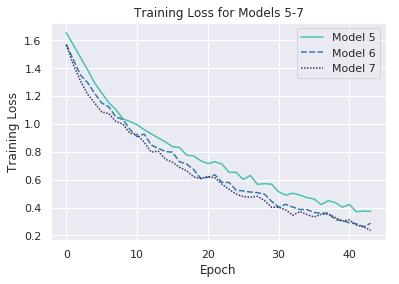

In [25]:
import seaborn as sns
import pandas as pd
sns.set(style="darkgrid")
#trainingLoss_df = pd.DataFrame(
#                    { 'Model R1': trainingLossList1,
#                      'Model R2': trainingLossList2,
#                      'Model R3': trainingLossList3,
#                      'Model R4': trainingLossList4
#                      'Model R5': trainingLossList5
#                    })

trainingLoss_df = pd.DataFrame(list(zip(trainLossList5, trainLossList6, trainLossList7)),
                              columns = ['Model 5','Model 6','Model 7'])
palette = sns.color_palette("mako_r", 3)
ax = sns.lineplot(data=trainingLoss_df, palette=palette).set_title('Training Loss for Models 5-7')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')



Text(0, 0.5, 'Validation Loss')

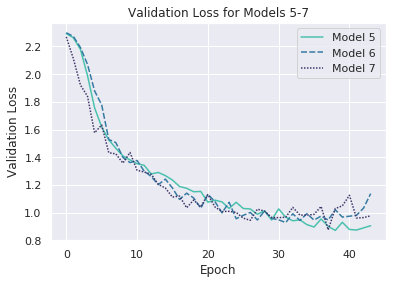

In [26]:
validLoss_df = pd.DataFrame(list(zip(validLossList5, validLossList6, validLossList7)),
                              columns = ['Model 5','Model 6','Model 7'])
palette = sns.color_palette("mako_r", 3)
ax = sns.lineplot(data=validLoss_df, palette=palette).set_title('Validation Loss for Models 5-7')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')


## Optimizing the Model with LR= 0.0008

* The above test accuracy and training and validation loss results indicate that LR=0.0008 is the optimal learning rate for this CNN architecture.
* The validation loss increasing starting from around epoch 30 could indicate overfitting by the model, creating a misleadingly higher test accuracy
* To test this and optimize the model further, the model was recreated and trained for fewer epochs with training stopping when the validation loss increases significantly.

In [66]:
#Define the Model

MonkeyClassifierOptimal = MonkeySpeciesCNN()
#Print the model
print(MonkeyClassifierOptimal)


MonkeySpeciesCNN(
  (conv1): Conv2d(3, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv1_BN): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_BN): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_BN): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=10, bias=True)
  (dropout): Dropout(p=0.25)
)


In [67]:
#Define the Criterion, Optimizer, and move the model to the GPU

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizerOptimal = optim.Adam(MonkeyClassifierOptimal.parameters(), lr=0.0008)
MonkeyClassifierOptimal.to(device)

MonkeySpeciesCNN(
  (conv1): Conv2d(3, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv1_BN): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_BN): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_BN): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=10, bias=True)
  (dropout): Dropout(p=0.25)
)

Epoch: 0 	Training Loss: 1.689770 	Validation Loss: 2.291682
Epoch: 1 	Training Loss: 1.541126 	Validation Loss: 2.248794
Epoch: 2 	Training Loss: 1.407558 	Validation Loss: 2.226705
Epoch: 3 	Training Loss: 1.277200 	Validation Loss: 2.063341
Epoch: 4 	Training Loss: 1.158217 	Validation Loss: 1.729941
Epoch: 5 	Training Loss: 1.094143 	Validation Loss: 1.464405
Epoch: 6 	Training Loss: 1.040513 	Validation Loss: 1.392923
Epoch: 7 	Training Loss: 0.986075 	Validation Loss: 1.385984
Epoch: 8 	Training Loss: 0.977874 	Validation Loss: 1.286297
Epoch: 9 	Training Loss: 0.889687 	Validation Loss: 1.299846
Epoch: 10 	Training Loss: 0.890271 	Validation Loss: 1.336085
Epoch: 11 	Training Loss: 0.819690 	Validation Loss: 1.243385
Epoch: 12 	Training Loss: 0.788228 	Validation Loss: 1.165908
Epoch: 13 	Training Loss: 0.730189 	Validation Loss: 1.125226
Epoch: 14 	Training Loss: 0.704718 	Validation Loss: 1.215056
Epoch: 15 	Training Loss: 0.676541 	Validation Loss: 1.106210
Epoch: 16 	Trainin

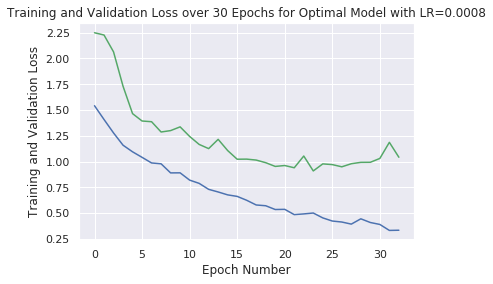

In [68]:
#Train the model

n_epochs = 34

trainLossListOptimal = []
validLossListOptimal = []

for epoch in range(n_epochs):
    train_loss = 0.0
    valid_loss = 0.0
    #Train the model on the training data
    MonkeyClassifierOptimal.train()
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizerOptimal.zero_grad()
        logps = MonkeyClassifierOptimal(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizerOptimal.step()
        train_loss += loss.item()*inputs.size(0)
        
    train_loss = train_loss/len(train_dataloader.dataset)
    
    #Validate the model on the validation data
    MonkeyClassifierOptimal.eval()
    for vinputs, vlabels in valid_dataloader:
        vinputs, vlabels = vinputs.to(device), vlabels.to(device)
        output = MonkeyClassifierOptimal(vinputs)
        vloss = criterion(output,vlabels)
        valid_loss += vloss.item()*vinputs.size(0)
    valid_loss = valid_loss/len(valid_dataloader.dataset)
    
    if epoch != 0:
        trainLossListOptimal.append(train_loss)
        validLossListOptimal.append(valid_loss)
        
    
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch,train_loss, valid_loss))
    
#Save the network weights
torch.save(MonkeyClassifierOptimal.state_dict(), 'monkeyModelWeightsOptimal.pth')



fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(trainLossListOptimal)), trainLossListOptimal, 'b')
plt.plot(np.arange(len(validLossListOptimal)), validLossListOptimal, 'g')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch Number')
plt.title('Training and Validation Loss over 30 Epochs for Optimal Model with LR=0.0008')
plt.show()

In [0]:
files.download('monkeyModelWeightsOptimal.pth')

In [69]:
# Predict classes for Test Dataset 

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


MonkeyClassifierOptimal.eval()

for data, target in test_dataloader:
    data, target = data.cuda(), target.cuda()
    output = MonkeyClassifierOptimal(data)
    loss = criterion(output, target)

    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output,1)
    correct_tensor = pred.eq(target.data.view_as(pred))
    
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    for i in range(1,batch_size): 
        label = target.data[i-1]
        class_correct[label] += correct[i].item()
        class_total[label] +=1
    
test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(0,10):
    if class_total[i]>0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' %( classes[i], 100*class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct) / np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.247123

Test Accuracy of monkey1: 75% (15/20)
Test Accuracy of monkey2: 81% (18/22)
Test Accuracy of monkey3: 83% (25/30)
Test Accuracy of monkey4: 64% (20/31)
Test Accuracy of monkey5: 66% (26/39)
Test Accuracy of monkey6: 87% (21/24)
Test Accuracy of monkey7: 73% (17/23)
Test Accuracy of monkey8: 62% (18/29)
Test Accuracy of monkey9: 81% (22/27)
Test Accuracy of monkey10: 55% (15/27)

Test Accuracy (Overall): 72% (197/272)
